<a href="https://colab.research.google.com/github/dilrabonu/Datasets/blob/main/D_Khidirova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we will see The Titanic_csv. It is about how many people survived in Titanic


Let's load Python necessary libraries for analyzing data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:

import os
for dirname, _, filenames in os.walk('/content/titanic.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

We do unzip the file

In [2]:
!unzip /content/titanic.csv.zip

Archive:  /content/titanic.csv.zip
  inflating: titanic.csv             
   creating: __MACOSX/
  inflating: __MACOSX/._titanic.csv  


Load the data

In [143]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 13 columns in this data
number
PassengerId- The id numbers of passengers
Survived-
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [144]:
df.shape

(891, 12)

There are 891 rows and 12 columns in this data

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the numbers of Age, cabin, Embarked are not equal. Thus we should correct their quantitive, if we do not correct them, the result will not sufficient

In [146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After seing NaN value, we drop unnecessary columns such as "Ticket, Name"

In [148]:
df.drop("Name", axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Lets' see visualization

In [149]:
sns.set()
def bar_chart(feature):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    df1=pd.DataFrame([survived, dead])
    df1.index=["Survived", "Dead"]
    df1.plot(kind="bar", stacked=True, figsize=(10, 5))

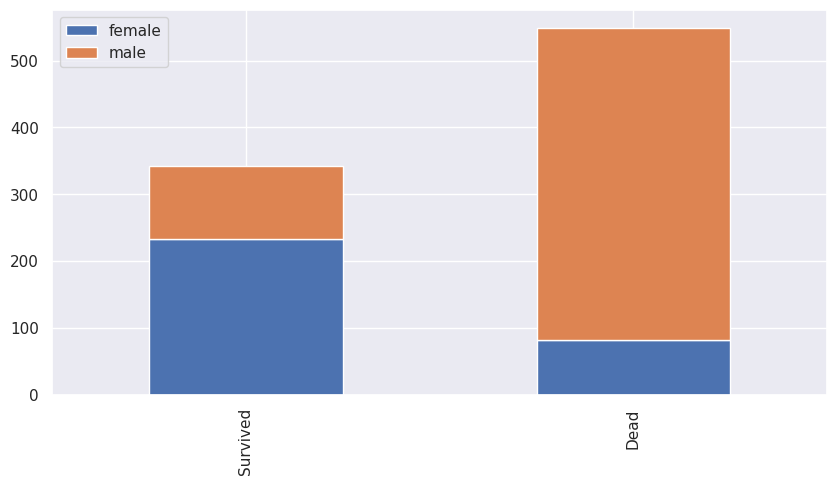

In [150]:
bar_chart("Sex")

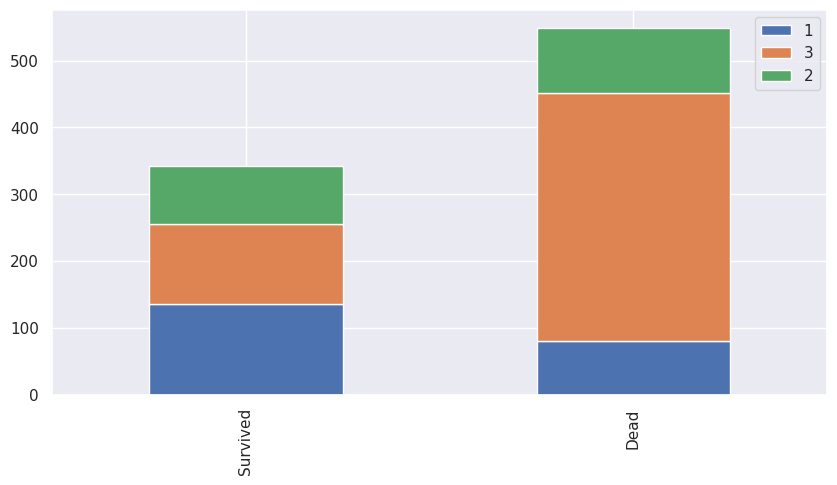

In [151]:
bar_chart("Pclass")

In [152]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


We alter strings to interger in data

In [153]:
sex_mapping={"male": 0, "female": 1}
df["Sex"]=df["Sex"].map(sex_mapping)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C


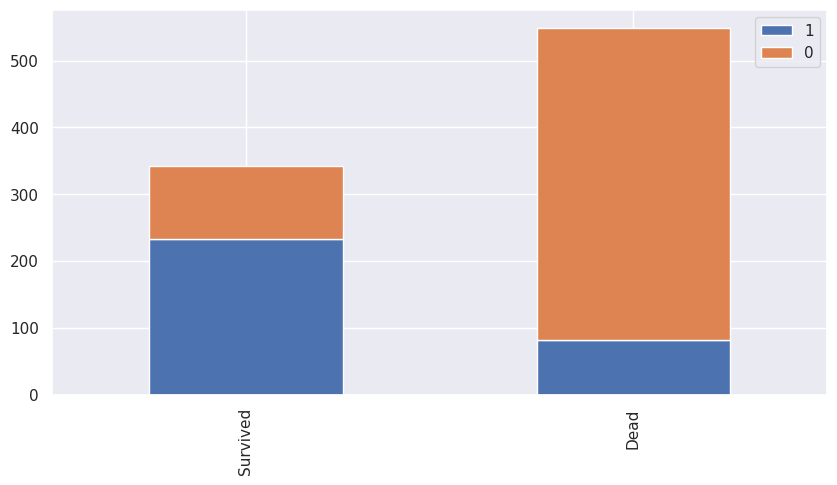

In [154]:
bar_chart("Sex")

In [155]:
df.fillna({"Age":0}, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,1,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


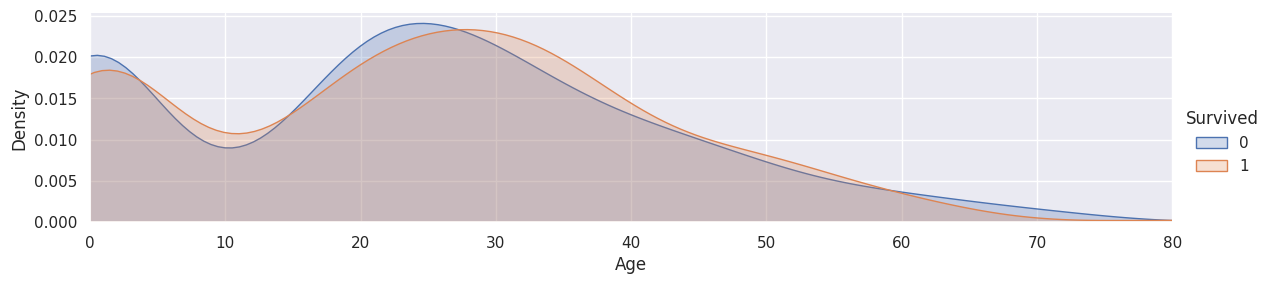

In [156]:
facet=sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()
plt.show()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [158]:
df.loc[df["Age"]<= 16, "Age"]=0
df.loc[(df["Age"]> 16) & (df["Age"]<= 26), "Age"] =1
df.loc[(df["Age"]> 26) & (df["Age"]<= 36), "Age"] =2
df.loc[(df["Age"]> 36) & (df["Age"]<= 62), "Age"] =3
df.loc[df["Age"]> 62,  "Age"]=1

In [159]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0,0.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C


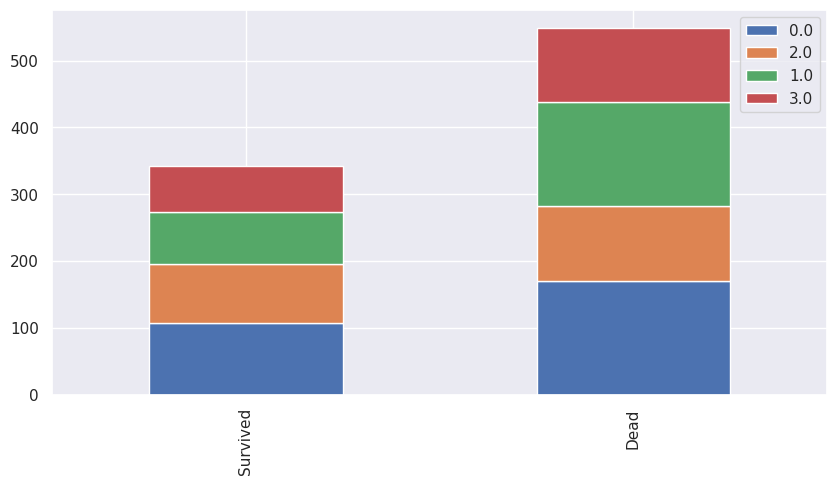

In [160]:
bar_chart("Age")

<Axes: >

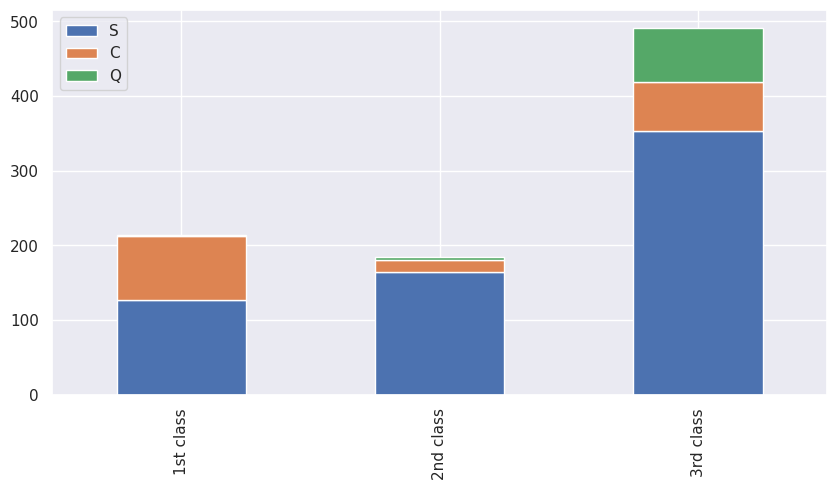

In [161]:
Pclass1=df[df["Pclass"]==1]["Embarked"].value_counts()
Pclass2=df[df["Pclass"]==2]["Embarked"].value_counts()
Pclass3=df[df["Pclass"]==3]["Embarked"].value_counts()
df1=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df1.index=["1st class", "2nd class", "3rd class"]
df1.plot(kind="bar", stacked=True, figsize=(10,5))

In [162]:
df["Embarked"]=df["Embarked"].fillna("S")

In [163]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S


In [164]:
embarked_mapping= {"S": 0, "C": 1, "Q": 2}
df["Embarked"]= df["Embarked"].map(embarked_mapping)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [166]:
df.loc[df["Fare"]<= 17, "Fare"]=0
df.loc[(df["Fare"]> 17) & (df["Fare"]<= 30), "Fare"] =1
df.loc[(df["Fare"]> 30) & (df["Fare"]<= 100), "Fare"] =2
df.loc[(df["Fare"]> 100), "Fare"] =3

In [167]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0


In [169]:
df["Cabin"]= df["Cabin"].str[:1]

<Axes: >

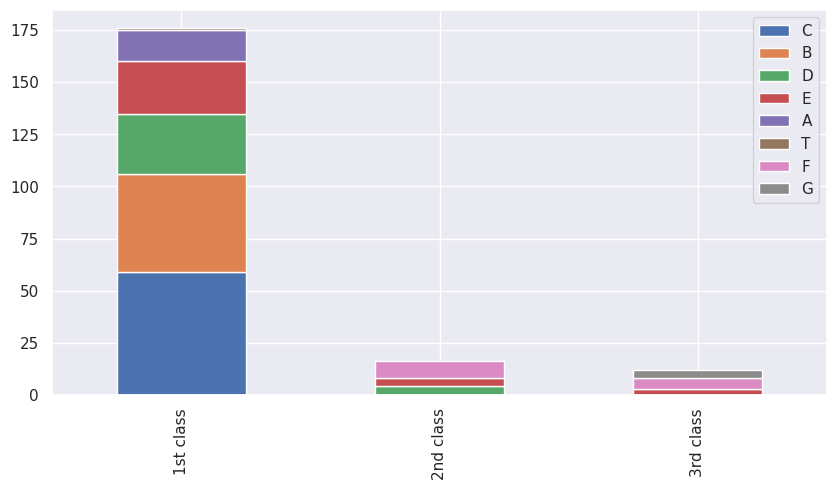

In [170]:
Pclass1=df[df["Pclass"]==1]["Cabin"].value_counts()
Pclass2=df[df["Pclass"]==2]["Cabin"].value_counts()
Pclass3=df[df["Pclass"]==3]["Cabin"].value_counts()
df1=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df1.index=["1st class", "2nd class", "3rd class"]
df1.plot(kind="bar", stacked=True, figsize=(10,5))

In [171]:
cabin_mapping={"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F" : 2, "G": 2.4, "T" : 2.8}
df["Cabin"]= df["Cabin"].map(cabin_mapping)

In [172]:
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 76.7+ KB


In [174]:
df["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [175]:
df["Embarked"].isnull().sum()

0

In [176]:
corr_matrix= df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

<ipython-input-176-28455863a5fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df.corr().abs()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,0.005007,0.035144,0.042939,0.042018,0.057527,0.001652,0.004665,0.037406,0.030467
Survived,0.005007,1.000000,0.338481,0.543351,0.021477,0.035322,0.081629,0.292884,0.279477,0.106811
Pclass,0.035144,0.338481,1.000000,0.131900,0.334185,0.083081,0.018443,0.693736,0.864697,0.045702
Sex,0.042939,0.543351,0.131900,1.000000,0.012083,0.114631,0.245489,0.216932,0.093314,0.116569
Age,0.042018,0.021477,0.334185,0.012083,1.000000,0.195511,0.053730,0.133130,0.238447,0.206458
SibSp,0.057527,0.035322,0.083081,0.114631,0.195511,1.000000,0.414838,0.341187,0.072361,0.059961
Parch,0.001652,0.081629,0.018443,0.245489,0.053730,0.414838,1.000000,0.364097,0.016359,0.078665
Fare,0.004665,0.292884,0.693736,0.216932,0.133130,0.341187,0.364097,1.000000,0.668376,0.008131
Cabin,0.037406,0.279477,0.864697,0.093314,0.238447,0.072361,0.016359,0.668376,1.000000,0.041238
Embarked,0.030467,0.106811,0.045702,0.116569,0.206458,0.059961,0.078665,0.008131,0.041238,1.000000


Prepare Machine Learning

In [193]:
X=df.drop("Survived", axis=1).values
y=df["Survived"]

In [194]:
from sklearn.preprocessing import StandardScaler #hammasini bitta oraliqqa qo'yish
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [179]:
df.drop("Ticket", axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,0.0,2.0,0
1,2,1,1,1,3.0,1,0,2.0,0.8,1
2,3,1,3,1,1.0,0,0,0.0,2.0,0
3,4,1,1,1,2.0,1,0,2.0,0.8,0
4,5,0,3,0,2.0,0,0,0.0,2.0,0


In [195]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [196]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold= KFold(n_splits=10, shuffle=True, random_state=0)

In [197]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [198]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 9) (179, 9) (712,) (179,)


Predict

In [188]:
model1 = RandomForestClassifier()


In [200]:
model1.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       105
           1       0.85      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



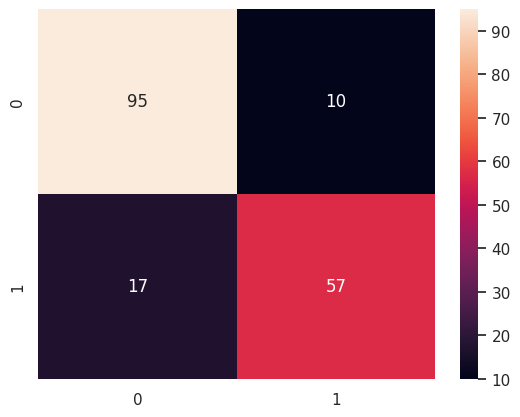

In [212]:
from sklearn.metrics import classification_report
y_pred= model1.predict(X_test)
print( classification_report(y_test, y_pred) )

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [209]:
clf=RandomForestClassifier()
scoring="accuracy"
score= cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73611111 0.75       0.81690141 0.76056338 0.78873239 0.83098592
 0.74647887 0.78873239 0.85915493 0.71830986]


In [210]:
clf= SVC()
scoring="accuracy"
score= cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76388889 0.75       0.83098592 0.8028169  0.85915493 0.81690141
 0.74647887 0.84507042 0.88732394 0.73239437]


In [211]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring= "accuracy"
score= cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.73611111 0.87323944 0.77464789 0.83098592 0.83098592
 0.74647887 0.78873239 0.83098592 0.73239437]


RandomForestClassifier shows the best result

In [213]:
df.to_csv("df_csv", index=False)